In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [37]:
train_df = pd.read_csv('/content/drive/MyDrive/PICT/SEM8/LPV/DL/DL2/Fashion/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/PICT/SEM8/LPV/DL/DL2/Fashion/fashion-mnist_test.csv')

In [38]:
class_names=['tshirts','trousers','pullover','dress','coat', 'sandal','shirt','sneaker','bag','ankle_shoe']

In [39]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train/255

In [40]:
y_train = train_df.iloc[:,0].to_numpy()

In [41]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test/255

In [54]:
y_test = test_df.iloc[:,0].to_numpy()

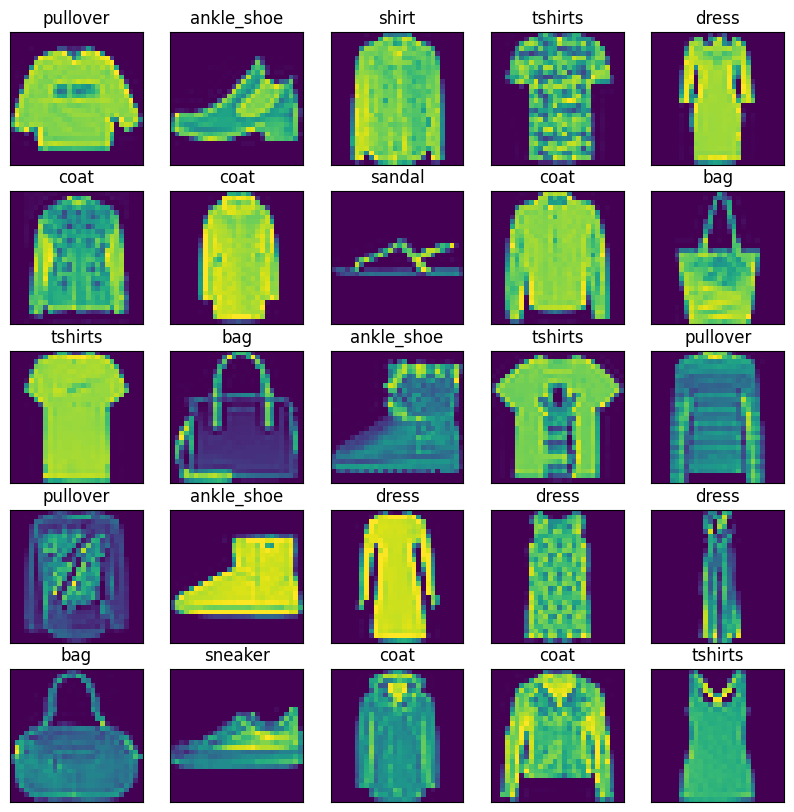

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i]])

In [48]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(5,5),activation='relu', padding="same",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,kernel_size=(5,5),activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 256)       

In [50]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=1200)

Epoch 1/50
50/50 [==============================] - 8s 94ms/step - loss: 0.2762 - accuracy: 0.8985
Epoch 2/50
50/50 [==============================] - 5s 94ms/step - loss: 0.2494 - accuracy: 0.9098
Epoch 3/50
50/50 [==============================] - 5s 100ms/step - loss: 0.2374 - accuracy: 0.9133
Epoch 4/50
50/50 [==============================] - 5s 100ms/step - loss: 0.2263 - accuracy: 0.9175
Epoch 5/50
50/50 [==============================] - 5s 98ms/step - loss: 0.2145 - accuracy: 0.9215
Epoch 6/50
50/50 [==============================] - 5s 96ms/step - loss: 0.2056 - accuracy: 0.9245
Epoch 7/50
50/50 [==============================] - 5s 99ms/step - loss: 0.1958 - accuracy: 0.9291
Epoch 8/50
50/50 [==============================] - 5s 101ms/step - loss: 0.1857 - accuracy: 0.9326
Epoch 9/50
50/50 [==============================] - 5s 99ms/step - loss: 0.1763 - accuracy: 0.9355
Epoch 10/50
50/50 [==============================] - 5s 103ms/step - loss: 0.1701 - accuracy: 0.9377
Epoch

In [55]:
evaluation = model.evaluate(x_test, y_test)
evaluation[1]

313/313 [==============================] - 2s 4ms/step - loss: 0.4168 - accuracy: 0.9318


0.9318000078201294

In [57]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=-1)

313/313 [==============================] - 1s 3ms/step


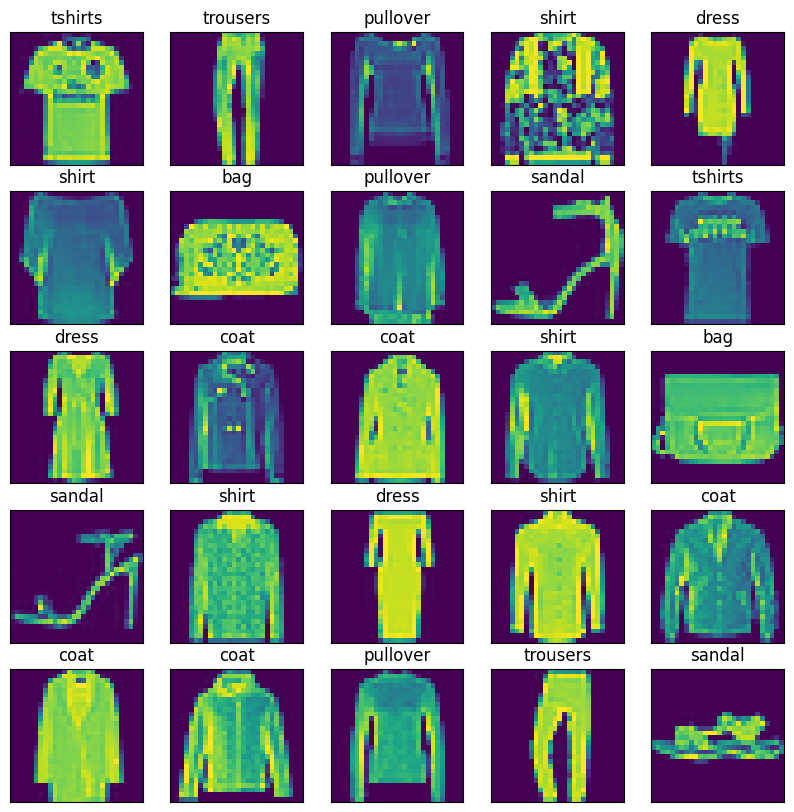

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i])
  plt.title(class_names[y_pred[i]])
plt.show()